# The numpy.ramdom package

### Programming for Data Analysis assessment 2019

## 1. Introduction
In this notebook I will explain the use of the numpy.random package in Python. It is organized into four distinct sections, each corresponding to a specific task as outlined in the assignment document. The accompanying README summarizes the findings of this investigation.

### Preliminaries

In [1]:
# Import required packages.
import matplotlib.pyplot as plt
import numpy as np

# matplotlib settings.
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

***
## 2. The purpose of the numpy.random package

The numpy.random package is a group of functions that allow for efficient and fast generation of arrays containing samples of random numbers; these sample values can be drawn from many different types of probability distribution. Python random? 

***
## 3. Simple random data and Permutations

## 3.1 Simple random data

This part of the numpy.random package comprises a group of functions which are capable of generating some basic random number samples. They include:
- rand
- randn
- random_integers
- random_sample
- choice
- bytes

The very first function **rand** generates random numbers from a uniform distribution, in the interval $[0.0, 1.0)$. A uniform distribution implies that all numbers in the interval are equally likely to be picked. The interval as written here includes 0 but not 1. The random numbers can be generated in an array of specified size, or singly if no array size given.

In [2]:
# Generate a single random number.
np.random.rand()

0.5054820095596029

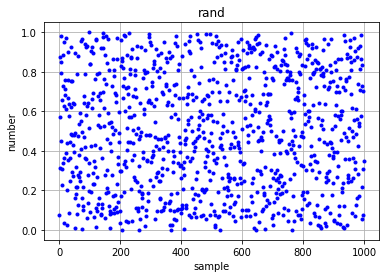

In [3]:
# Generate an array of random numbers, array size given as a parameter.
x1 = np.random.rand(1000)
plt.plot(x1, 'b.')
plt.title('rand')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how the random numbers generated fill the range 0 to 1. 


Compare this with generating numbers from a different type of distribution, the standard normal distribution of mean 0 and variance 1, using **randn**. The mean is the average value. The variance measures now far the numbers are spread out from the mean in the distribution. 

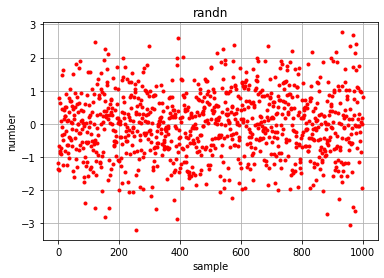

In [4]:
# Return numbers from a standard normal distribution with mean 0 and variance 1.
x2 = np.random.randn(1000)
plt.plot(x2, 'r.')
plt.title('randn')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how these numbers are more bunched around zero, which is the default mean for randn.

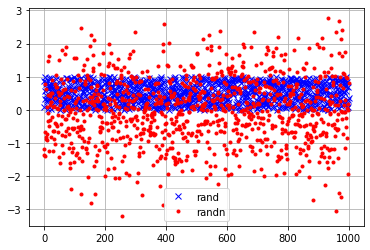

In [5]:
# Compare the two functions just used in a scatterplot.
plt.plot(x1, 'bx', label='rand')
plt.plot(x2, 'r.', label='randn')
plt.grid()
plt.legend()

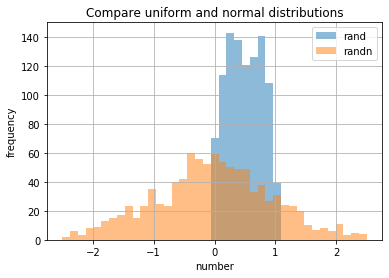

In [6]:
# Compare the two functions just used using histograms.
bins = np.linspace(-2.5, 2.5, 40)
plt.hist(np.random.rand(1000), bins, alpha=0.5, label='rand')
plt.hist(np.random.randn(1000), bins, alpha=0.5, label='randn')
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Compare uniform and normal distributions')
plt.grid()
plt.legend(loc='upper right')

Once again notice how the generated numbers lie within a range and all have the same chance of being sampled when using **rand**. In contrast, the **randn** function generates numbers with a spread, so that numbers around the specified mean have highest frequency. We can manipulate the latter distribution to look more like the former by playing around with the parameters; shrink the variance to reduce the spread and offset the sample by the mean. The numbers are now drawn from a normal distribution $N(\mu, \sigma^2)$, where $\mu$ is the mean, $\sigma^2$ is the variance, and $\sigma$ is the standard deviation.

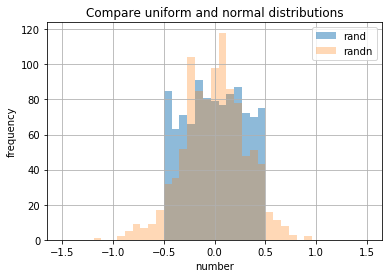

In [7]:
# Modify randn pars to shrink the spread and offset rand to have mean 0.
bins = np.linspace(-1.5, 1.5, 40)
plt.hist(np.random.rand(1000) - 0.5, bins, alpha=0.5, label='rand') # mean 0.5
plt.hist(0.3 * np.random.randn(1000), bins, alpha=0.3, label='randn') # mean = 0, variance 0.3
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Compare uniform and normal distributions')
plt.grid()
plt.legend(loc='upper right')

The package contains two functions for generating random integers, **randint** and **random_integers**. The documentation states that **random_integers** has been deprecated so we will only discuss **rantint**, which generates random integers in the interval $[low, high)$. Eg. of use?

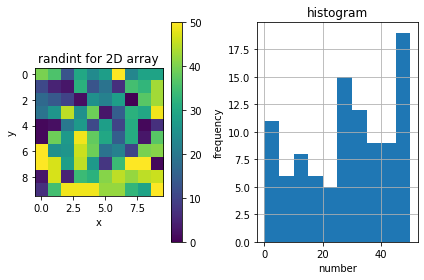

In [8]:
# Return a 10x10 array of random integers from low (inclusive) to high (exclusive).
high = 51; low = 0
a = np.random.randint(low, high, size=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('randint for 2D array')

# np.reshape() to straighten array
plt.subplot(1, 2, 2)
b = np.reshape(a, 100)
plt.hist(b)
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('histogram')
plt.grid()

plt.tight_layout()

This function can be used to simulate rolling a six-sided die or tossing a fair coin. The die roll has 6 possible outcomes (the numbers 1 to 6) while the coin toss has only two (heads or tails represented by 1 and 0). 

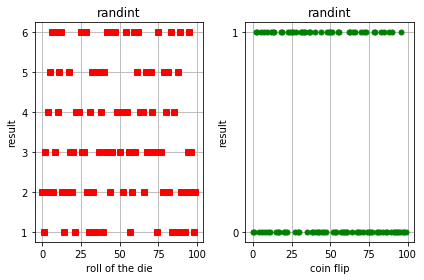

In [9]:
d1 = np.random.randint(1, 7, 100)

plt.subplot(1, 2, 1)
plt.plot(d1, 'rs')
plt.title('randint')
plt.xlabel('roll of the die')
plt.ylabel('result')
plt.grid()

plt.subplot(1, 2, 2)
c1 = np.random.randint(0, 2, 100)
plt.plot(c1, 'go', markersize=5)
plt.title('randint')
plt.xlabel('coin flip')
plt.ylabel('result')
plt.grid()
plt.yticks(np.arange(2))

plt.tight_layout()

There are a number of functions which, on first glance, appear to do the same thing. Indeed, they (**random, ranf, sample**) are all aliases to the function **random_sample**. This function generates random floating point numbers in the half open interval $[0.0, 1.0)$. The numbers are drawn from a continuous uniform distribution.

In [10]:
# 2 x 5 array of random floats.
np.random.random_sample((2,5))

array([[0.80984871, 0.15654977, 0.30180187, 0.17242467, 0.39475815],
       [0.59064797, 0.05765596, 0.02136374, 0.0060585 , 0.63332784]])

For example , if I wanted to use some of these functions to pick my Euromillions numbers, I might naively think to use the **randint** function. However, we need to be careful because this function allows for any number in the range to be chosen more than one time. This possibility for repetition would not necessarily be obvious on picking just five numbers. However, if the sample size is larger the repeated integers become visible. The correct function to use here would be **choice** with the replace keyword set to False. This function generates a random sample of specified size from a 1D array. The array does not have to contain integers, it could contain a list of names for example. 

In [11]:
# Return 5 random integers from low (inclusive) to high (exclusive); here [0,51)
np.random.randint(51, size=20)

array([43, 23, 43, 42,  6, 50, 13, 15, 49, 17, 31, 33, 30, 20, 43, 13, 35,
       23, 21,  3])

In [12]:
# Randomly select 5 numbers from a list, once a number is picked it can't be chosen again.
np.arange(1, 51) # list of integers from 1 to 50
np.random.choice(np.arange(1, 51), 20, replace=False)

array([ 8,  4, 35, 48,  1,  2, 50, 17,  7, 23, 42, 29, 10, 30, 36, 15,  3,
       40, 46, 25])

The last function in this part of the package is **bytes**, which returns a number of random bytes.

In [13]:
# Return 5 random bytes.
np.random.bytes(5)

b'R\xc4\xcbx4'

## 3.2 Permutations

A permutation is a ... The function **shuffle** shuffles the contents of an array or a list. It the array has 2 dimensions, this function shuffles the rows but the elements of each row are *not* changed by the process. Beware, the list itself is modified by the process of shuffling.

In [14]:
# Shuffle a simple list.
x = np.arange(15) # list
print("original list", x)
np.random.shuffle(x) # shuffle it
print("shuffled list", x)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shuffled list [ 2  3  9  1 13  0  7 10 14  4  5 12  8  6 11]


In [15]:
# Shuffle a 2D array.
y = np.arange(15).reshape(3,5) # transform list to array
print("original array\n", y)
np.random.shuffle(y) # shuffle it
print("shuffled array\n", y)

original array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shuffled array
 [[10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


Notice here how the order of the rows is changed, but the order of elements in each row is not. If the array has higher dimension than 2, then it is only the first dimension that is shuffled. What could this be used for?

The **permutation** function appears to do the exact same thing on first glance. However, on closer inspection, I realized that it leaves the original list/array intact. The list to be shuffled is passed to the function as an integer; the function computes the list from the supplied integer using Snp.arange(int). It shuffles the first dimension of a multi-dimensional array in the same was as **shuffle** does, but uses a copy of the array.

In [16]:
# Permute a simple list.
print("original list", np.arange(20))
z = np.random.permutation(20) # shuffle it
print("shuffled list", z)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
shuffled list [ 5 17  2  8 11 14  1  9 18 16 19  6 15  7 13 12  3 10  0  4]


In [17]:
# Permute a 2D array. fix
y = np.arange(24).reshape(6,-1) # list (-1 means 2nd dim calculated)
print("original array\n", y)
print("shuffled array\n", np.random.permutation(y)) # shuffle a copy of it.

original array
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
shuffled array
 [[ 4  5  6  7]
 [16 17 18 19]
 [ 0  1  2  3]
 [ 8  9 10 11]
 [20 21 22 23]
 [12 13 14 15]]


***
## 4. Distribution functions

***
## 5. The use of seeds in generating pseudorandom numbers

In [18]:
x = np.random.rand(10000)

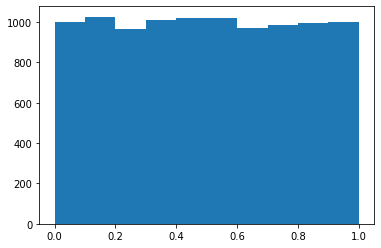

In [19]:

plt.hist(x)
plt.show()

***
Uniform distribution within a range

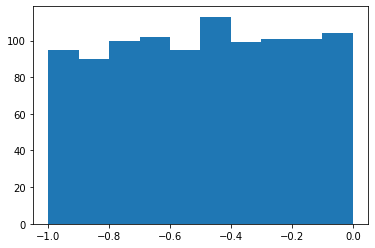

In [20]:
r = np.random.uniform(-1, 0, 1000)
plt.hist(r)
plt.show()

***
Uniform distribution centered around a value with given spread.

(array([  5.,  12.,  41., 111., 216., 231., 215., 118.,  42.,   9.]),
 array([ 6.65894978,  7.26625541,  7.87356105,  8.48086669,  9.08817233,
         9.69547796, 10.3027836 , 10.91008924, 11.51739488, 12.12470051,
        12.73200615]),
 <a list of 10 Patch objects>)

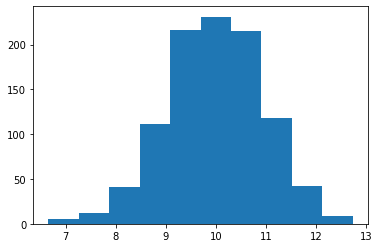

In [21]:
mu, sigma = 10, 1
n = np.random.normal(mu, sigma, 1000)
plt.hist(n)

***
Logistic distribution

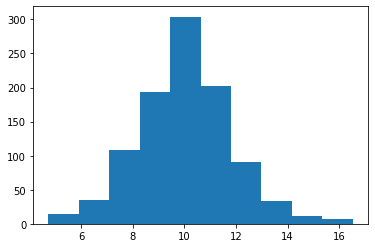

In [22]:
loc, scale = 10, 1
s = np.random.logistic(loc, scale, 1000)
plt.hist(s)
plt.show()

***
Exponential distribution

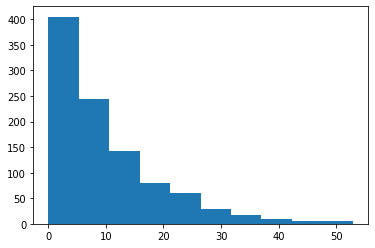

In [23]:
e = np.random.exponential(10, 1000)
plt.hist(e)
plt.show()

***
Seeds in numpy.random

In [24]:
seed = 1
np.random.RandomState(seed)

In [25]:
## np.random.get_state()